In [1]:
import sys
for p in ['..']:
  if p not in sys.path:
    sys.path.insert(0, p)

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.display import HTML

from digits.data import Env
from digits.explore import *

%matplotlib inline

env = Env('..')
env.assert_ready()
print("ready")

ready


/Users/charolastra/miniconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
model = 'tf'
variant = 'mnist'
e = explore(env, model, variant, 'test', assert_complete=True)

In [3]:
e.metrics.accuracy()

0.75835714285714284

In [4]:
e.metrics.gold_class_dist()

array([ 0.09892857,  0.11392857,  0.10228571,  0.1015    ,  0.09421429,
        0.08864286,  0.09964286,  0.10657143,  0.19428571])

In [5]:
e.metrics.pred_class_dist()

array([ 0.09571429,  0.128     ,  0.09535714,  0.11078571,  0.11678571,
        0.07214286,  0.10114286,  0.10778571,  0.17228571])

In [6]:
HTML(viz_table(e.viz.wrong_certain))

,index,gold_class,pred_class,p,entropy,proc_image
0,0,4,9,1.0,0.0,
1,9288,8,1,1.0,0.0,
2,9293,8,9,1.0,0.0,
3,9294,3,5,1.0,0.0,
4,9296,9,7,1.0,0.0,
5,9302,6,1,1.0,0.0,
6,9304,2,4,1.0,0.0,
7,9311,8,5,1.0,0.0,
8,9286,8,9,1.0,0.0,
9,9284,3,8,1.0,0.0,


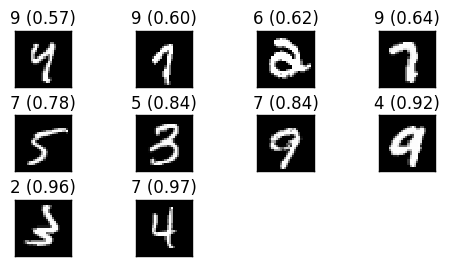

In [7]:
plot_images(e.viz.wrong_uncertain, lambda r: '%d (%.2f)' % (r.pred_class, r.p), lambda r: r.to_dict()['proc_image'], show=True)

In [8]:
e.learning_curve.head()

,step,seen,train_acc,train_loss,valid_acc,valid_loss
0,0,0,0.125,12066.60,0.130,12083.30
1,25,2500,0.620,1856.32,0.605,2041.25
2,50,5000,0.745,1293.37,0.805,1064.93


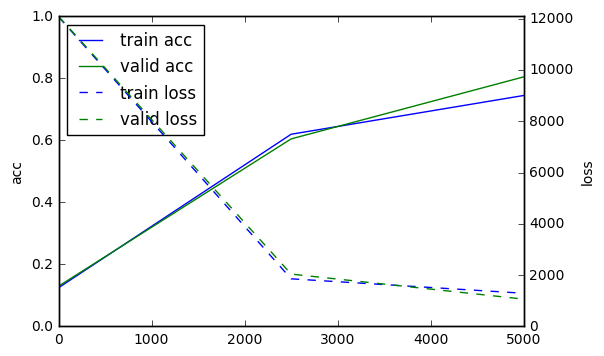

In [9]:
plot_learning(e.learning_curve, show=True)

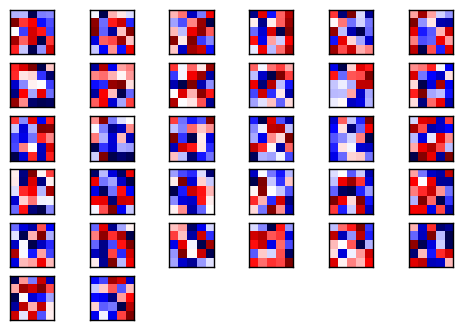

In [10]:
plot_weights(e.conv_weights, 0, show=True)

In [11]:
wu = e.activations['wrong_uncertain']

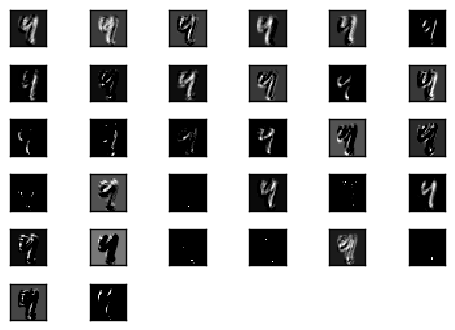

In [12]:
plot_images(wu[(wu.layer == 0) & (wu.image == 0)], lambda r: None, lambda r: r.to_dict()['activations'], show=True)